In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')


In [217]:
def wrangle(data_path):
    df = pd.read_csv(data_path)

    # Displaying the initial observations
    print("Initial Observations:")
    print(df.head(10))
    print()

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(df.info(show_counts=True))
    print()

    # Check for duplicated rows
    print("Number of duplicated rows:", df.duplicated().sum())
    print()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(df.describe().transpose())
    print()

    #print shape of data
    print(df.shape)

    # Columns with null values
    print("Columns with null values:")
    columns_with_null = df.columns[df.isnull().any()].tolist()
    print(columns_with_null)
    print()

    # # forward fill the null values in columns
    # df.ffill(inplace=True)
    # print()

    #to check is null again
    print(df.isnull().sum())

    return df

# Example usage
data_path = "heart.csv"
data = wrangle(data_path)


Initial Observations:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up 

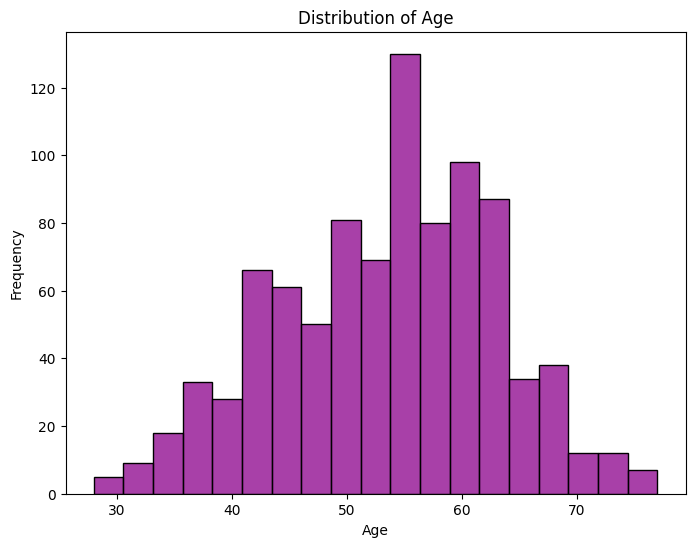

In [218]:

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Age", color = "darkmagenta")
plt.title(f'Distribution of Age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Age'>

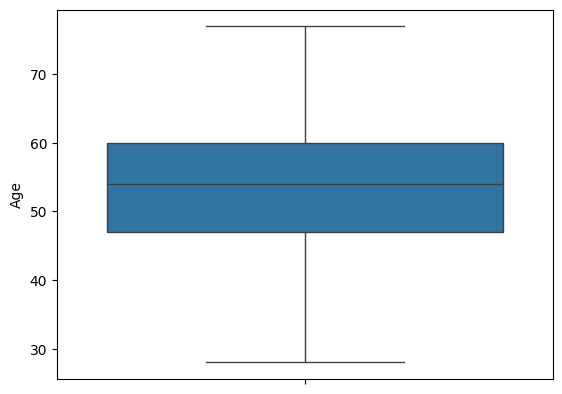

In [219]:
sns.boxplot(data['Age'])

  Sex  count
0   M    725
1   F    193


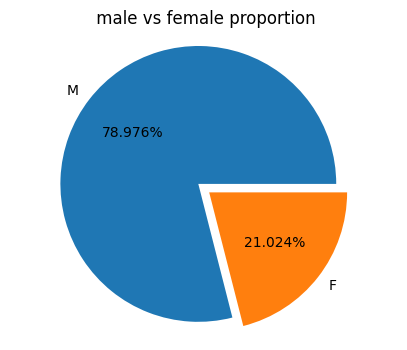

In [220]:
totalSex = data.Sex.value_counts().reset_index()
print(totalSex)
plt.figure(figsize=(5,4))
plt.pie(totalSex['count'],labels=totalSex['Sex'], autopct="%1.3F%%" , explode=[0.1,0])
plt.title(" male vs female proportion")
plt.axis('equal')
plt.show()


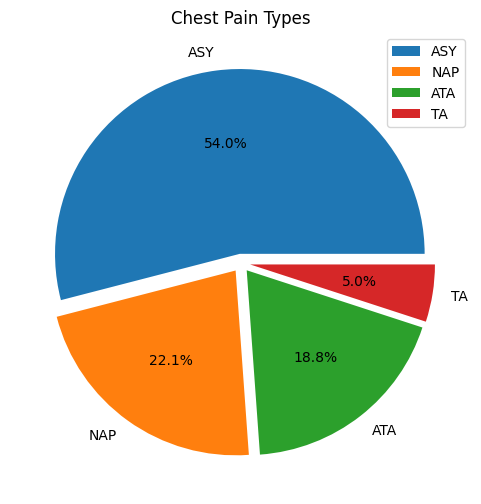

In [221]:
ChestPainType = data['ChestPainType'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(ChestPainType, labels=['ASY', 'NAP', 'ATA', 'TA'],
                        autopct='%1.1f%%', shadow=False,
                        explode=[0.05, 0.05, 0.05, 0.05])
plt.title('Chest Pain Types')
plt.legend()
plt.show()

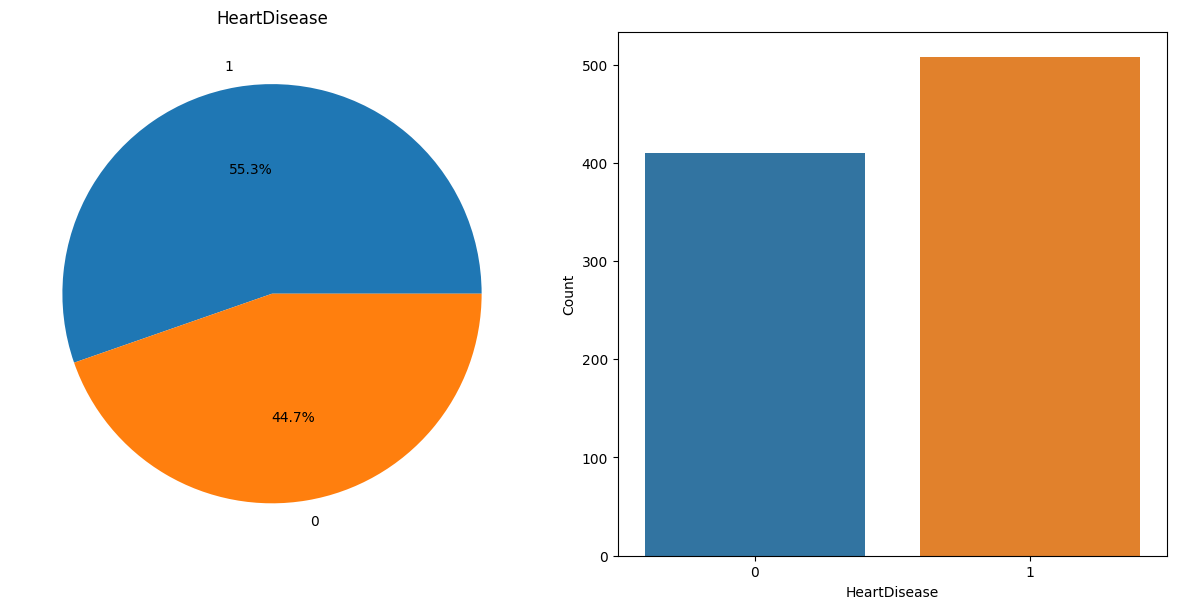

In [222]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plotting pie chart
data['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], ax=axs[0])
axs[0].set_title('HeartDisease')
axs[0].set_ylabel('')

# Plotting count plot
sns.countplot(x='HeartDisease', data=data,palette=['#1f77b4', '#ff7f0e'], ax=axs[1])
axs[1].set_xlabel('HeartDisease')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 47.7% of the population has heart disease.
# 52.3% of the population does not have heart disease

In [223]:
# Drop observations where 'RestingBP' is 0
data = data[data['RestingBP'] != 0]

# Identify the indices of rows where 'Cholesterol' is 0
zeros = list(data[data['Cholesterol'] == 0].index)

# Drop the identified rows from the DataFrame
data.drop(index=zeros, inplace=True)


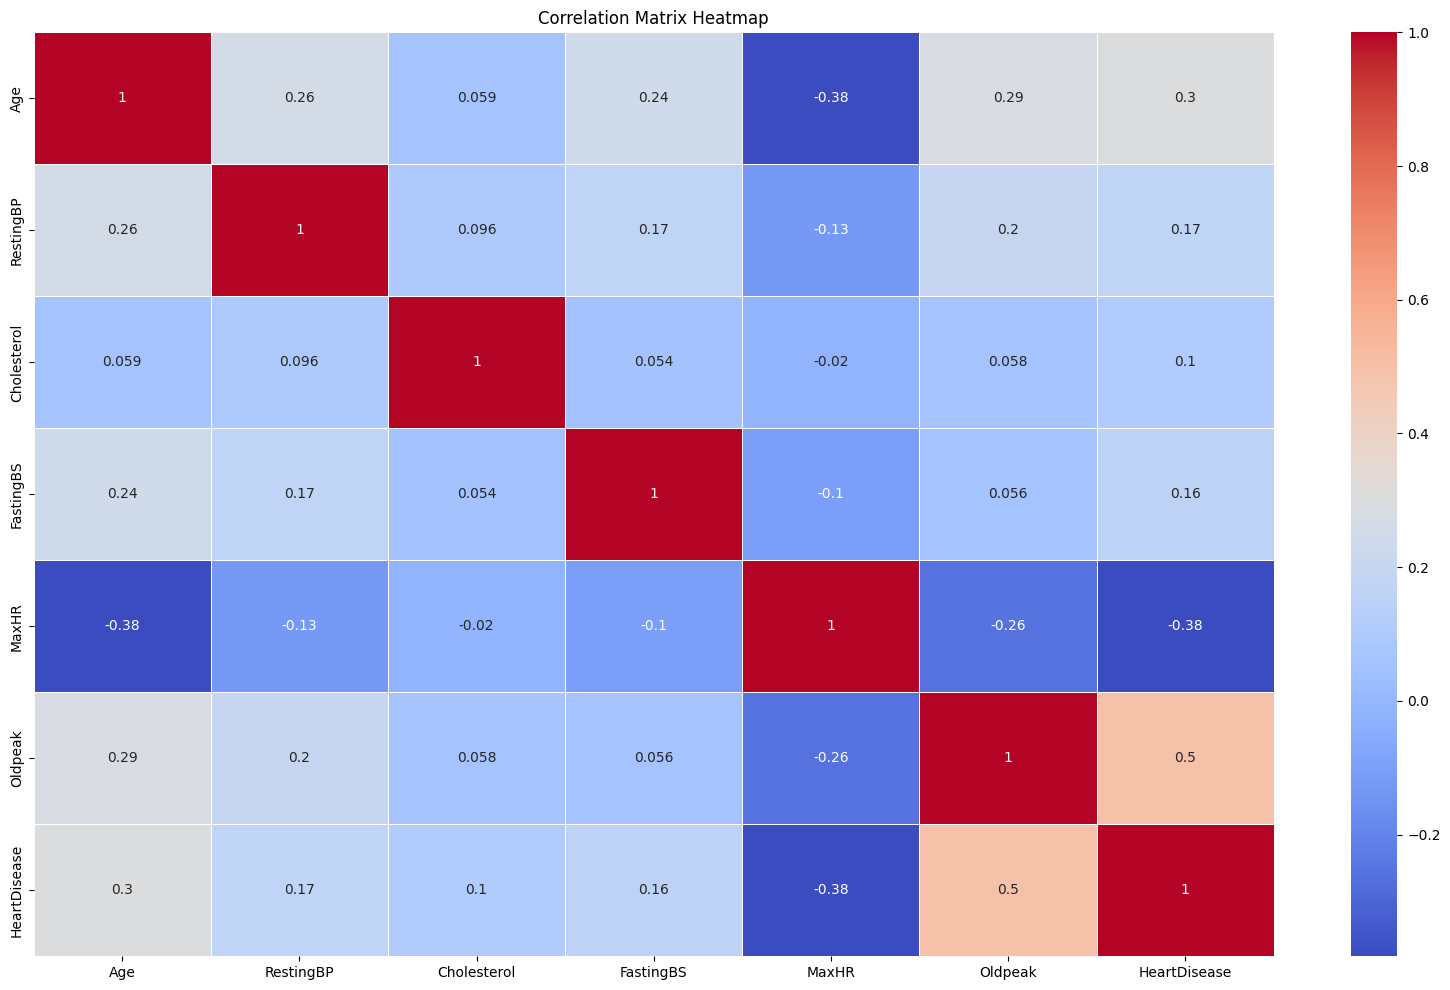

In [224]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [225]:
# Encode Sex column
from sklearn.preprocessing import LabelEncoder
LabelEncoderModel = LabelEncoder()
data['Sex'] = LabelEncoderModel.fit_transform(data['Sex'])
print(data['Sex'].value_counts())
print()
# Encode ChestPainType column
data['ChestPainType'] = LabelEncoderModel.fit_transform(data['ChestPainType'])
print(data['ChestPainType'].value_counts())
print()
# Encode RestingECG column
data['RestingECG'] = LabelEncoderModel.fit_transform(data['RestingECG'])
print(data['RestingECG'].value_counts())
print()
# Encode ExerciseAngina column
data['ExerciseAngina'] = LabelEncoderModel.fit_transform(data['ExerciseAngina'])
print(data['ExerciseAngina'].value_counts())

print()
# Encode ST_Slope column
data['ST_Slope'] = LabelEncoderModel.fit_transform(data['ST_Slope'])
print(data['ST_Slope'].value_counts())

Sex
1    564
0    182
Name: count, dtype: int64

ChestPainType
0    370
2    169
1    166
3     41
Name: count, dtype: int64

RestingECG
1    445
0    176
2    125
Name: count, dtype: int64

ExerciseAngina
0    459
1    287
Name: count, dtype: int64

ST_Slope
1    354
2    349
0     43
Name: count, dtype: int64


In [226]:
# Divide data into dependent and independent
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [227]:
# Scaling Model
StandardScalerModel = StandardScaler()
X = StandardScalerModel.fit_transform(X)
print(X)

[[-1.35607325  0.56806253  0.1665881  ... -0.79074163 -0.84094155
   0.9868448 ]
 [-0.40865641 -1.76036959  1.21091347 ... -0.79074163  0.0917709
  -0.6863057 ]
 [-1.67187886  0.56806253  0.1665881  ... -0.79074163 -0.84094155
   0.9868448 ]
 ...
 [ 0.43349189  0.56806253 -0.87773728 ...  1.26463557  0.27831339
  -0.6863057 ]
 [ 0.43349189 -1.76036959  0.1665881  ... -0.79074163 -0.84094155
  -0.6863057 ]
 [-1.56661032  0.56806253  1.21091347 ... -0.79074163 -0.84094155
   0.9868448 ]]


In [228]:
# Splitting Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# **Logistic Regression**

In [229]:
LogisticRegressionModel = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)
# Score of model
print('Score of train data = ', round(LogisticRegressionModel.score(X_train, y_train), 4))
print('Score of test data = ', round(LogisticRegressionModel.score(X_test, y_test), 4))
print()
preds = LogisticRegressionModel.predict(X_test)
print(classification_report(y_test, preds))

Score of train data =  0.854
Score of test data =  0.8733

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        78
           1       0.86      0.88      0.87        72

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



In [230]:
# Random Forest Classifier
RandomForestClassifierModel = RandomForestClassifier(n_estimators=10, criterion='entropy')
RandomForestClassifierModel.fit(X_train, y_train)
# Score of model
print('Score of train data = ', round(RandomForestClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(RandomForestClassifierModel.score(X_test, y_test), 4))
preds = RandomForestClassifierModel.predict(X_test)
print(classification_report(y_test, preds))

Score of train data =  0.9933
Score of test data =  0.8467
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        78
           1       0.85      0.83      0.84        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



# **Naive Bayes**

In [231]:
GNBC = GaussianNB()
GNBC.fit(X_train, y_train)
# Score of model
print('Score of train data = ', round(GNBC.score(X_train, y_train), 2))
print('Score of test data = ', round(GNBC.score(X_test, y_test), 2))
print()
preds = GNBC.predict(X_test)
print(classification_report(y_test, preds))

Score of train data =  0.84
Score of test data =  0.88

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        78
           1       0.90      0.85      0.87        72

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



# **SVC WITH LINEAR KERNEL**

In [232]:
# Initialize the SVC model with a specific kernel, 'linear'
SVC_model = SVC(kernel='linear', random_state=42)
SVC_model.fit(X_train, y_train)

# Score of the model
print('Score of train data = ', round(SVC_model.score(X_train, y_train), 2))
print('Score of test data = ', round(SVC_model.score(X_test, y_test), 2))
print()
# Make predictions
preds = SVC_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, preds))

Score of train data =  0.86
Score of test data =  0.9

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        78
           1       0.90      0.89      0.90        72

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



# **according to the previous models:**
**SVM Model has the best accurecy = 0.9 .so i will predict the test data**

In [233]:
y_pred = SVC_model.predict(X_test)

Text(95.72222222222221, 0.5, 'Truth')

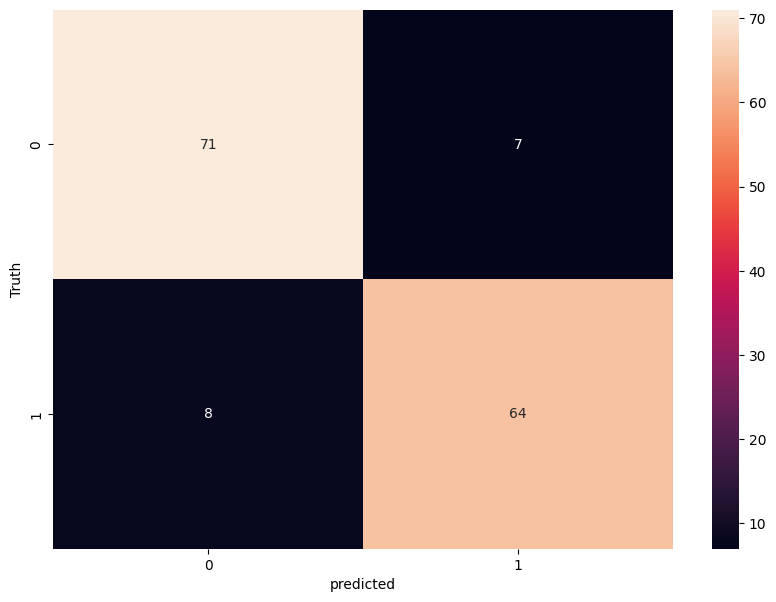

In [234]:
ConfusionMetricModel = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

# **Pipeline with:**
**LogisticRegression, RandomForestClassifier,GradientBoostingClassifier**

In [235]:
numeric_features =['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [236]:
categorical_features =['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# Define the numeric pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_remover', RobustScaler()),
    ('skewness_corrector', PowerTransformer(method='yeo-johnson', standardize=True))
])

# Define the categorical pipeline
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [237]:
X = data.drop("HeartDisease", axis  =1)
y = data["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_transformed = pipeline.fit_transform(x_train)
X_test_transformed = pipeline.transform(x_test)
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GradientBoostingClassifier()

In [238]:
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)],
    voting='hard')
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier_remover',
                                                                   RobustScaler()),
                                                                  ('skewness_corrector',
                                                                   PowerTransformer())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('classifier',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rf', RandomForestClassifier()),
                                              ('gb',
                                               GradientBoostingClassifier())]))])

In [239]:
# Transform the test data
y_pred = pipeline.predict(x_test)

In [240]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        71
           1       0.95      0.87      0.91        79

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

